# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from DecisionTree import DecisionTree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score

data = pd.read_csv('FourClassDS.csv')
print("Ending of Importing...")

Ending of Importing...


## Verification Metrics

In [2]:
def calc_accuracy(y_true, y_pred):
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

def calc_metric(conf_matrix):
    TP = []
    TN = []
    FP = []
    FN = []

    num_classes = conf_matrix.shape[0]

    for i in range(num_classes):
        TP.append(conf_matrix[i, i])
        FN.append(np.sum(conf_matrix[i, :]) - TP[i])
        FP.append(np.sum(conf_matrix[:, i]) - TP[i])
        TN.append(np.sum(conf_matrix) - (FP[i] + FN[i] + TP[i]))
    return TP, TN, FP, FN
    
def calc_precision(TP, FP):
    micro = np.average(TP) / (np.average(TP) + np.average(FP))
    macro = 0
    for i in range(len(TP)):
        macro += TP[i] / (TP[i] + FP[i])
    macro /= len(TP)
    return macro, micro

def calc_recall(TP, FN):
    micro = np.average(TP) / (np.average(TP) + np.average(FN))
    macro = 0
    for i in range(len(TP)):
        macro += TP[i] / (TP[i] + FN[i])
    macro /= len(TP)
    return macro, micro

def calc_f1_score(micro_prec, macro_prec, micro_recall, macro_recall):
    micro = 2 * np.average(micro_prec) * np.average(micro_recall) / (np.average(micro_prec) + np.average(micro_recall))
    macro = 0
    for i in range(len(macro_prec)):
        macro += 2 * macro_prec * macro_recall / (macro_prec + macro_recall)
    macro /= len(macro_prec)
    return macro, micro

## Test Train Data

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 1:-1].values, data.iloc[:, -1].values, test_size=0.3)
y_train = np.reshape(y_train,(x_train.shape[0], 1) )
y_test  = np.reshape(y_test, (x_test.shape[0] , 1) )
data_train = arr = np.hstack((x_train, y_train))
data_test = arr = np.hstack((x_test, y_test))
print(data_train.shape, data_test.shape)

(287, 361) (124, 361)


## Train 

In [4]:
decision_tree = DecisionTree(data_train, 36)
decision_tree.construct()

The tree is constructed


## Training Results

0.7630662020905923


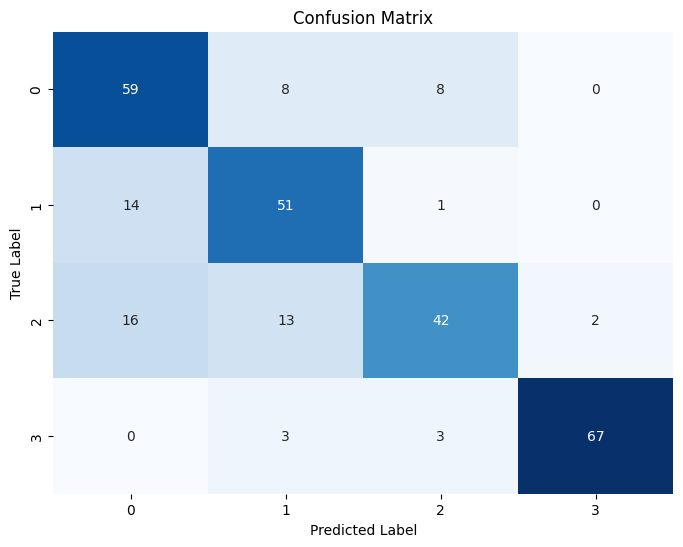

In [5]:
y_pred_train = []
for i in range(data_train.shape[0]):
    y_pred_train.append(decision_tree.predict(data_train[i,:], decision_tree.root_branch))
print(calc_accuracy(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
TP, TN, FP, FN = calc_metric(conf_matrix_train)



macro_prec = precision_score(y_train, y_pred_train, average='macro')
micro_prec = precision_score(y_train, y_pred_train, average='micro')

macro_recall = recall_score(y_train, y_pred_train, average='macro')
micro_recall = recall_score(y_train, y_pred_train, average='micro')

macro_f1 = f1_score(y_train, y_pred_train, average='macro')
micro_f1 = f1_score(y_train, y_pred_train, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.7630662020905923  Macro:  0.7729284047115019
Recall | Micro:  0.7630662020905923  Macro:  0.7631361560813615
F1 Score | Micro:  0.7630662020905923  Macro:  0.761998936276683


## Testing Results

0.6693548387096774


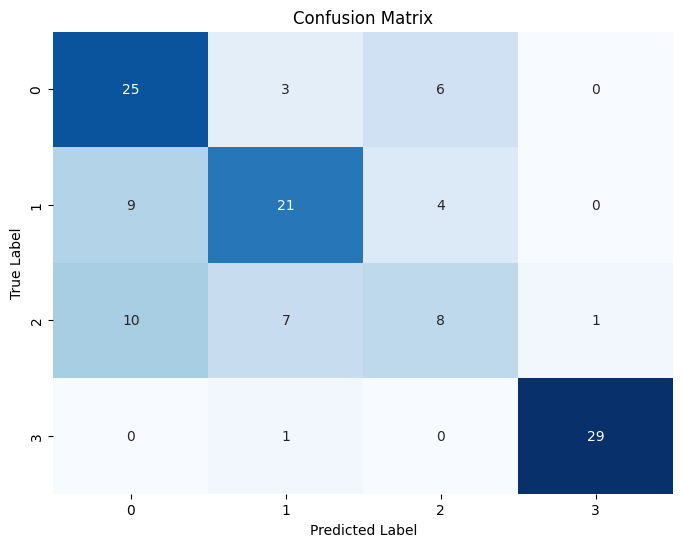

In [7]:
y_pred_test = []
for i in range(data_test.shape[0]):
    y_pred_test.append(decision_tree.predict(data_test[i,:], decision_tree.root_branch))
print(calc_accuracy(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
TP, TN, FP, FN = calc_metric(conf_matrix_test)
macro_prec = precision_score(y_test, y_pred_test, average='macro')
micro_prec = precision_score(y_test, y_pred_test, average='micro')

macro_recall = recall_score(y_test, y_pred_test, average='macro')
micro_recall = recall_score(y_test, y_pred_test, average='micro')

macro_f1 = f1_score(y_test, y_pred_test, average='macro')
micro_f1 = f1_score(y_test, y_pred_test, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.6693548387096774  Macro:  0.6588857323232323
Recall | Micro:  0.6693548387096774  Macro:  0.6568250377073906
F1 Score | Micro:  0.6693548387096774  Macro:  0.6519230769230769


## Find Ideal Depth Size

The tree is constructed
For depth =  1  Accuracy =  0.46774193548387094
The tree is constructed
For depth =  2  Accuracy =  0.46774193548387094
The tree is constructed
For depth =  3  Accuracy =  0.46774193548387094
The tree is constructed
For depth =  4  Accuracy =  0.5161290322580645
The tree is constructed
For depth =  5  Accuracy =  0.532258064516129
The tree is constructed
For depth =  6  Accuracy =  0.5645161290322581
The tree is constructed
For depth =  7  Accuracy =  0.5645161290322581
The tree is constructed
For depth =  8  Accuracy =  0.6048387096774194
The tree is constructed
For depth =  9  Accuracy =  0.6370967741935484
The tree is constructed
For depth =  10  Accuracy =  0.6532258064516129
The tree is constructed
For depth =  11  Accuracy =  0.6532258064516129
The tree is constructed
For depth =  12  Accuracy =  0.6612903225806451
The tree is constructed
For depth =  13  Accuracy =  0.6532258064516129
The tree is constructed
For depth =  14  Accuracy =  0.6774193548387096

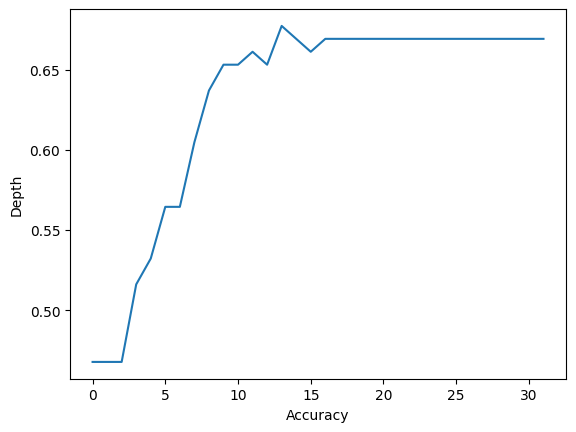

In [10]:
acc = []

for i in range(1, 33):
    decision_tree = DecisionTree(data_train, i)
    decision_tree.construct()

    y_pred_test = []
    for j in range(data_test.shape[0]):
        y_pred_test.append(decision_tree.predict(data_test[j,:], decision_tree.root_branch))
    print("For depth = ", i, " Accuracy = ", calc_accuracy(y_test, y_pred_test))
    acc.append(calc_accuracy(y_test, y_pred_test))

plt.plot(acc)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.show()